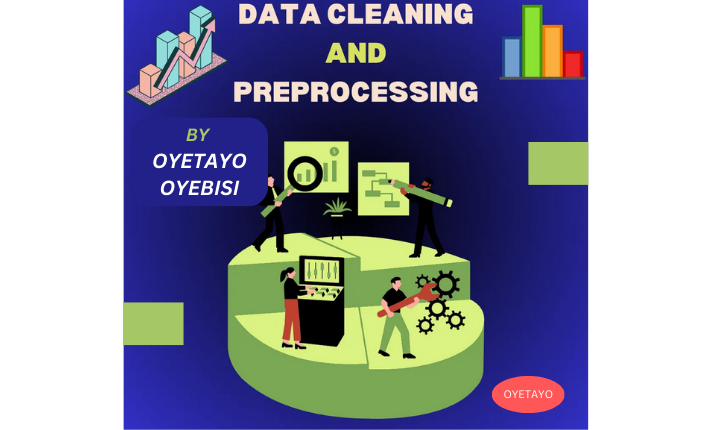

# Why Data Cleaning and Preprocessing Matter
Data cleaning and preprocessing are crucial steps in the data science pipeline, often consuming
a large portion of a data scientist's time. Why is it so crucial? In essence, data is messy.
Real-world data, the kind that companies and organizations collect every day, is filled with
inaccuracies, inconsistencies, and missing entries. As the saying goes, "Garbage in, garbage
out." If we feed our predictive models with dirty, inaccurate data, the performance and
accuracy of our models will be compromised.
In a broader sense, data cleaning and preprocessing are necessary to ensure data integrity.
They enable us to refine and organize the raw data into a more suitable format that can be
analyzed effectively and reliably. The integrity of the data we use in our analyses directly
affects the validity of our conclusions. Therefore, spending time on this stage of the pipeline
can save us from drawing incorrect conclusions, making poor decisions, or developing
ineffective models.

## Understanding Data Quality Issues: 
This will provide us with the ability to
identify common data quality issues such as missing values, outliers, and inconsistent
formatting. We'll also explore how to assess data quality and integrity
### ● Handling Missing Data: 
Exploration of different techniques for dealingwith missing data, such as deletion, imputation, and interpolation. We'll get hands-onwith Python's Pandas library, which offers powerful functions for handling missing
data.
### ● Dealing with Outliers: 
Outliers can significantly skew our analyses and predictive
models. This will introduce us to various outlier detection techniques and
strategies for dealing with these anomalies.
### ● Data Normalization and Scaling: 
Here, we'll understand the importance of data
normalization and scaling, and learn about different techniques to implement these
processes using Python.
### ● Feature Selection and Extraction: 
This will provide an introduction to the
critical aspect of feature selection and extraction. We'll explore different techniques and
get hands-on with Python code examples to practice the concepts.
### ● Encoding Categorical Variables:
This will help us understand the challenges
posed by categorical variables and how to encode these variables effectively.
### ● Handling Imbalanced Data:
Imbalanced data can lead to biased machine learning
models. Here, we'll explore various techniques for dealing with imbalanced data.




## DATA CLEANING 


#### Missing Values:
Addressed by deletion, filling with statistical values, or 
predictive methods.
#### Outliers: 
Identified using statistical techniques like Z-score or IQR, and 
handled by truncation or imputation.
#### Duplicates
Detected and removed to prevent skewed analysis results.
#### Inconsistencies:
Corrected for uniformity in recording, such as 
consistent units or date formats

## Handling Missing Values - Overview
Handling missing values is a critical step in data cleaning. Missing data 
can lead to biased or incorrect results, so it's important to handle them 
appropriately. The three primary strategies we'll discuss are: 
* Dropping missing values
* Imputation techniques
* Interpolation


## Dropping missing values
Dropping missing values is the simplest method, where we remove the rows or 
columns containing missing data.it is easy to implement, and it does not introduce additional biaseness but it can result in loss of valuable data and it is not ideal when missing data is not random
* when to use 
(i) Use when the dataset is large enough and a small proportion of data is missing (ii) Missing data is likely to be random 



In [ ]:
# Importing necessary library
import pandas as pd
# Loading your dataset
df = pd.read_csv('your_file.csv') # Replace 'your_file.csv' with your filename
# Checking for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

This simple command prints the count of missing values in each column. A high number of
missing values in a column may call for a different strategy compared to a column with fewer
missing values.

In [ ]:
df.dropna(inplace =true) #
the dropna() will drop all the columns with the missing values

## Imputation Techniques

Imputation involves filling missing values with estimated ones. The method can vary 
depending on the nature of the data and the type of variable.
* Mean/Median/Mode Imputation: 
Replace missing values with the mean (for 
continuous variables) or median/mode (for categorical variables).
* Predictive Imputation:
Use statistical or machine learning algorithms to predict 
missing values based on other data.

This method prevents data loss, Can handle non-random missingness if done correctly and this method Can introduce bias if assumptions are incorrect and  More complex to implement

#### Use when:
* Missingness is not random
* Enough non-missing data is available to make reasonable estimates



In [ ]:
# Mean imputation
df.fillna(df.mean(), inplace=True) # continuous variables

# median imputation
df.fillna(df.median(), inplace=True) #categorical variables)

# Mode imputation
df.fillna(df.mean(), inplace=True) ##categorical variables)

# Constant value imputation
df.fillna(0, inplace=True)

# Forward fill
df.fillna(method='ffill', inplace=True) # filling with previous value
# Backward fill
df.fillna(method='bfill', inplace=True) # filling with next value


#### Predictive Imputation: 
This technique involves using statistical models or machine learning
algorithms to predict missing values based on other data. It's more accurate but also more
complex

In [ ]:
# Predictive imputation using linear regression
from sklearn.linear_model import LinearRegression
# Split data into sets with missing values and without
missing = df[df['A'].isnull()]
not_missing = df[df['A'].notnull()]
# Initialize the model
model = LinearRegression()
# Train the model
model.fit(not_missing.drop('A', axis=1), not_missing['A'])
# Predict missing values
predicted = model.predict(missing.drop('A', axis=1))
# Fill in missing values
df.loc[df['A'].isnull(), 'A'] = predicted


In [ ]:
# USING IMPUTER
from sklearn.impute import SimpleImputer
# Create our imputers
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')
# Get lists of numeric and categorical column names
num_cols = train_df.select_dtypes(include=np.number).columns.tolist()
cat_cols = train_df.select_dtypes(include='object').columns.tolist()
# Impute missing values
train_df[num_cols] = num_imputer.fit_transform(train_df[num_cols])
train_df[cat_cols] = cat_imputer.fit_transform(train_df[cat_cols])

## DEALING WITH OUTLIER
Outliers are data points that significantly differ from the rest of the dataset. 
They can affect the performance of machine learning models and lead to 
incorrect conclusions. In this section, we will discuss three methods for 
detecting and handling outliers: 
* Z-score method
* IQR method
* Winsorization




#### Z-score 
The Z-score is a measure of how many standard deviations an observation is from the
mean. A common rule of thumb is that a data point with a Z-score greater than 3 or less than-3 is considered an outlier.

This method Works well for normally distributed data, Simple to calculate and implement but it is Sensitive to extreme valuesAssumes ,data follows a normal distribution
#### Use when:
* Data is approximately normally distributed
* The underlying distribution of data is symmetri

In [ ]:
from scipy import stats
z_scores = np.abs(stats.zscore(outlier_data))
outliers = outlier_data[(z_scores > 3)]

## IQR method
The Interquartile Range (IQR) method identifies as outliers the data points that
fall below the first quartile or above the third quartile by a factor of the IQR. A common factor
to use is 1.5.
* 1. Identify Quartiles: The first quartile (Q1) is the middle number between the smallest 
number and the median of the dataset, representing the 25th percentile. The third 
quartile (Q3) is the middle value between the median and the highest value, 
representing the 75th percentile.
* 2. Calculate IQR: The Interquartile Range (IQR) is the difference between Q3 and Q1. 
It represents the middle 50% of the data.
IQR = Q3 - Q1
* 3. Define Outlier Bounds: Outliers are values that fall outside the range defined by Q1 - 1.5 * IQR and Q3 + 1.5 * IQR.
Lower bound = Q1 - 1.5 * IQR
Upper bound = Q3 + 1.5 * IQR
* 4. Identify Outliers: Any data points falling below the lower bound or above the upper 
bound are considered outliers

This method is Robust to extreme values, Doesn't assume normal distribution, Can be less effective for identifying outliers in small datasets,
Assumes data is unimodal
#### Use when:
* Data is not normally distributed
* Robustness to extreme values is important


In [ ]:
Q1 = np.percentile(outlier_data, 25)
Q3 = np.percentile(outlier_data, 75)
IQR = Q3 - Q1
outliers = outlier_data[((outlier_data < (Q1 - 1.5 * IQR)) | (outlier_data > (Q3 +
1.5 * IQR)))]


In [ ]:
import matplotlib.pyplot as plt
# Boxplot
plt.boxplot(outlier_data)
plt.show()
# Scatter plot
plt.scatter(range(len(outlier_data)), outlier_data)
plt.show()

## Strategies for Handling Outliers
#### Deletion
Deletion, or dropping, is the simplest way to handle outliers, but it should be used with
caution. You only want to drop an outlier if you're certain that it's due to incorrectly entered or
measured data. Deleting valuable data points can lead to loss of information and biased results.
#### Transformation
Transforming variables can also help to minimize the impact of outliers. Common
transformations include log, square root, and inverse transformations. These can compress
the higher values, thereby reducing the effect of extreme values
#### Winsorization
In a winsorized dataset, the extreme values are replaced by certain percentiles (typically the
20
5th and 95th). This technique maintains the size of the dataset, unlike deletion.

In [ ]:
# eletion or dropping
# Filter out the outliers
filtered_data = outlier_data[(z_scores <= 3)]
del filtered_data
data.drop(filtered_data)

# Apply log transformation
log_data = np.log(outlier_data)

from scipy.stats.mstats import winsorize
# Apply winsorization
winsorized_data = winsorize(outlier_data, limits=[0.05, 0.05]


### Machine learning usage
Some machine learning models, like Random Forests and SVMs, are less sensitive to outliers.
Using these models could be a viable strategy when dealing with outliers.

In [ ]:
from sklearn.ensemble import IsolationForest
# Handle outliers using Isolation Forest
clf = IsolationForest(contamination=0.2)
pred = clf.fit_predict(data.reshape(-1, 1))
data_no_outliers = data[pred == 1]
print(f'Data after removing outliers using Isolation Forest: {data_no_outliers}')


## Duplicate Data Detection and Removal
Duplicated data are identical entries in your dataset. They can mislead 
the analysis by over-representing certain information, biasing the results. Let's 
explore how to detect and remove duplicate data

## Pros
* Easy to implement
* Improves data accuracy
## Cons:
* Requires caution; duplicates could be valid data repetitions
## Use when:
* There are certain data points repeated without any variations
* Duplication is not a natural aspect of your data collection


## Data Preprocessing
* 1. Data Transformation: 
Applying techniques to make data meet machine learning 
assumptions.
* 2. Feature Scaling and Normalization: Implementing methods to balance 
numerical input variables.
* 3. Encoding Categorical Variables: Using techniques to convert categorical 
variables into numerical.
* 4. Feature Selection: Selecting the most pertinent features using methods such as 
filter, wrapper, or embedded methods.
* 5. Feature Engineering: Creating new features from existing ones to enhance 
model performance, based on domain knowledge or automation

#### Feature Scaling and Normalization
Machine learning algorithms perform better when input numerical variables fall within a
similar scale. Without normalization or scaling, features with higher values may dominate the
model's outcome. This could lead to misleading results and a model that fails to capture the
influence of other features.
Normalization and scaling bring different features to the same scale, allowing a fair
comparison and ensuring that no particular feature dominates others. Moreover, these
techniques can also accelerate the training process. For instance, gradient descent converges
faster when features are on similar scales

Feature scaling and normalization are techniques used to standardize the range of 
features in a dataset. This is crucial in machine learning, as models often perform 
better when numerical input variables are on a similar scale. We will discuss 
* Min-Max Scaling, 
* Standard Scaling (Z-score normalization), and 
* Robust Scaling

### Min-Max Scaling
Simple and intuitive
Min-Max scaling, also known as normalization, 
rescales the features to a fixed range, usually 0 to 1
This method preserves the original distribution,Sensitive to outliers
,Not suitable for data with large standard deviations
#### Use when:
* You want to preserve zero values in the dataset
* Your data doesn't contain extreme outliers



In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Create a simple dataset
data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
# Create a scaler, fit and transform the data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)


### Standard Scaling
This technique standardizes the feature such that it has a mean of 0 and a standard deviation
of 1. It redistributes the features with their mean 
at 0 and standard deviation as 1
This method Centers the distribution around 0, Handles outliers better than Min-Max Scaling
Doesn't normalize the distribution to a specific range, Can be influenced by outliers if extreme
#### Use when:
* Your data follows a Gaussian distribution
* Your algorithm assumes data is centered (e.g., Principal Component Analysis)




In [1]:
from sklearn.preprocessing import StandardScaler
# Create a scaler, fit and transform the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)

NameError: name 'data' is not defined

### Robust Scaling
Robust scaling uses the interquartile range, instead of the mean and standard deviation, 
making it robust to outliers
This method Pros:reduces the effects of outliers,Useful for data with heavy-tailed distributions
,Doesn't scale the data to a specific range
,May not perform well on non-Gaussian distributions
#### Use when:
* Your data contains many outliers
* You want to reduce the impact of outlier

In [ ]:
from sklearn.preprocessing import RobustScaler
# Create a scaler, fit and transform the data
scaler = RobustScaler()
robust_scaled_data = scaler.fit_transform(data)


In [7]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
# Let's create a simple dataframe
df = pd.DataFrame({
'A': [1, 2, 3, 4, 5],
'B': [100, 200, 400, 800, 1000],
'C': [200, 400, 600, 800, 1000]
})
# Initialize a min-max scaler
min_max_scaler = MinMaxScaler()
# Scale the dataframe
df_min_max = pd.DataFrame(min_max_scaler.fit_transform(df), columns=df.columns)
# Initialize a standard scaler
std_scaler = StandardScaler()
# Scale the dataframe
df_std = pd.DataFrame(std_scaler.fit_transform(df), columns=df.columns)
# Initialize a robust scaler
robust_scaler = RobustScaler()
# Scale the dataframe
df_robust = pd.DataFrame(robust_scaler.fit_transform(df), columns=df.columns)
print("Original Data")
print(df)
print("\nMin-Max Scaled Data")
print(df_min_max)
print("\nStandard Scaled Data")
print(df_std)
print("\nRobust Scaled Data")
print(df_robust)

Original Data


## Feature Selection and Extraction
Feature selection and extraction are pivotal steps in the data preprocessing pipeline for
machine learning and data science projects. These techniques can make the difference between
a model that performs exceptionally well and one that falls flat.

### Feature Selection
Feature selection is the process of selecting a subset 
of relevant features (variables or predictors) for use in 
model construction. 
Feature selection is the process of reducing the number of input variables when 
developing a predictive model. It is crucial to remove irrelevant or partially relevant 
features that can negatively impact model performance. 

● Filter Methods, 
● Wrapper Methods, and 
● Embedded Methods
This is important for the following reasons:

* Simplicity: Fewer features make the model simpler and easier to interpret.
* Speed: Less data means algorithms train faster.
* Prevention of overfitting: Less redundant data means less opportunity to make
decisions based on noiseredictors) for use in model construction. This is imp
#### Filter Methods
Filter methods for feature selection apply a statistical measure to assign a scoring to each 
feature. The features are ranked by the score and either selected to be kept or removed from the 
dataset. The methods are often univariate and consider the feature independently, or with regard 
to the dependent variable.
Here are some examples of filter methods:
* 1. Pearson’s Correlation: It is used as a measure for quantifying linear dependence between 
two continuous variables. 
* 2. Chi-Squared Test: It is used for testing the relationship between categorical variables. 
* 3. Mutual Information: Mutual information measures the dependency between the features.
* 4. ANOVA F-Value: It is used to calculate the degree of linear dependency between the 
feature and the target variabl

This method is simple and easy to implement, Fast and computationally efficient
Cons, Does not consider interactions between features, Based only on the intrinsic properties of the data
#### Use when:
● You have a large number of features
● You want to quickly filter out irrelevant features




In [ ]:
# Import libraries
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.datasets import load_iris
# Load dataset
iris = load_iris()
X, y = iris.data, iris.target
# Feature selection
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)


### Wrapper Methods
Wrapper methods for feature selection consider the selection of a set of features as a search problem, 
where different combinations are prepared, evaluated and compared to other combinations. A predictive 
model is used to evaluate a combination of features and assign a score based on model accuracy.
* 1. Forward Selection: Forward selection begins with an empty model and adds variables one by one. 
At each step, the variable that gives the highest improvement to the model is added, until no 
improvement is observed.
* 2. Backward Elimination: Backward elimination begins with a model including all the features. It 
removes variables one by one. At each step, the variable that causes the least decrease in 
performance is removed, until no improvement is observed.
* 3. Recursive Feature Elimination (RFE): This is a more sophisticated version of backward 
elimination. At each step, it removes either a fixed number or a fraction of variables. It uses model 
accuracy to identify which variables (and combination of variables) contribute the most to predict the 
target variable

This method Searches for the best feature subset,Considers interactions between features
,Computationally expensive, Prone to overfitting
#### Use when:
* You have a moderate number of features
* Computational resources and time are not primary constraints


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=2, step=1)
selector = selector.fit(X, y)

### Embedded Methods
Embedded methods are a catch-all group of techniques which perform feature selection as part of the 
model construction process. They are constructed by algorithms that have their own built-in feature 
selection methods.
* 1. LASSO Regression: LASSO (Least Absolute Shrinkage and Selection Operator) adds a penalty 
equivalent to the absolute value of the magnitude of coefficients. This can result in some 
coefficients to become zero, hence eliminating them from the model.
* 2. RIDGE Regression: RIDGE adds a penalty equivalent to square of the magnitude of coefficients. 
All coefficients are shrunk by the same factor (so none are eliminated), but this can help 
multicollinearity issues.
* 3. ElasticNet: It is a combination of both LASSO and RIDGE. It adds both L1 (absolute) and L2 
(squared) penalties on the coefficients.
* 4. Tree-based methods: Decision Trees, Random Forests, and Gradient Boosting algorithms can 
also provide feature importance which can be used for feature selection

This method is More accurate than filter methods, Faster than wrapper methods
Cons, Can be complex to implement, Prone to overfitting if not handled correctly
## Use when:
* You want to optimize the performance of the model
* You need a balance between performance and speed


In [15]:
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.datasets import make_regression
# Build a regression dataset
X, y = make_regression(noise=4, random_state=0)
# LassoCV: Lasso linear model with iterative fitting along a regularization path
lasso = LassoCV().fit(X, y)
importance = np.abs(lasso.coef_)


### Feature Extraction
Feature extraction, on the other hand, is the process of transforming or mapping the original
high-dimensional data into a lower-dimensional space. Unlike feature selection, where we
keep the original features, feature extraction creates new ones that represent most of the
"useful" information in the original data. The benefits are:
* Dimensionality reduction: Similar to feature selection, fewer features speed up training.
* Better performance: Sometimes, the model can learn better in the transformed space.
#### Principal Component Analysis (PCA)
PCA is a technique used to emphasize variation and bring out strong patterns in a dataset. It's
often used to make data easy to explore and visualize


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


In [ ]:
### t-Distributed Stochastic Neighbor Embedding (t-SNE)

In [ ]:
t-SNE is a machine learning algorithm for visualization developed by Laurens van der Maaten
and Geoffrey Hinton. It is a nonlinear dimensionality reduction technique well-suited for
embedding high-dimensional data for visualization in a low-dimensional space of two or
three dimensions

In [ ]:
from sklearn.manifold import TSNE
X_tsne = TSNE(n_components=2).fit_transform(X)

## Encoding Categorical Variables
Categorical variables represent types of data which may be divided into groups. 
Since machine learning algorithms require numerical inputs, we need techniques 
to convert these categorical variables into a suitable numerical form. We'll cover 
three common methods: 
* Label Encoding, 
* One-Hot Encoding, and 
* Target Encoding

### Label Encoding
Label Encoding involves converting each value in a categorical column into a number. For 
example, if we have a feature called "Color" that has three categories: "Red", "Green", and 
"Blue". We could map these categories to numbers: "Red" = 1, "Green" = 2, "Blue" = 3.
This method is Simple and easy to implement, Does not increase the dimensionality of the data
Implies an ordered relationship between categories,May lead to poor performance if the categorical variable is nominal
## Use when:
● The categorical variable is ordinal (i.e., there's a logical order to the categories)


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['category_encoded'] = le.fit_transform(df['category'])


### One-Hot Encoding
One-Hot Encoding involves creating new columns indicating the presence (or absence) of each 
unique value in the original data.
For example, if we have a feature called "Color" with three categories: "Red", "Green", and "Blue". 
One-Hot Encoding would create three new features: "Color_Red", "Color_Green", and "Color_Blue". 
If the original color was "Red", then "Color_Red" would be 1, and "Color_Green" and "Color_Blue" 
would both be 0.

This method reates cbinary vectors, eliminating any implied order Suitable for nominal categories (no inherent order)
Can significantly increase data dimensionality,Not suitable for categories with many unique values (high cardinality)
#### Use when:
* The categorical variable is nominal
* The number of unique categories is small


In [ ]:
import pandas as pd
# Assuming `df` is your DataFrame and `category` is the categorical feature
df_one_hot = pd.get_dummies(df, columns=['category'], prefix='category')

onehotencoder = OneHotEncoder()
category =onehotencoder.fit_transform(df['category']).toarray()

#### Dealing with High Cardinality and Rare Categories
High cardinality means that a category feature has a lot of unique values, which can be
problematic for certain encoding methods. For example, a one-hot encoding of a high
cardinality feature can greatly expand the memory footprint of your dataset.

One way to handle high cardinality is to group less common values into an 'other' category.
This can also help with the problem of rare categories, which may be present in your training
data but unlikely to appear in future data

In [ ]:
counts = df['category'].value_counts()
other = counts[counts < threshold].index
df['category'] = df['category'].replace(other, 'Other')


### Examples for Categorical Variable Encoding

In [20]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# Let's create a simple DataFrame
data = {'name': ['John', 'Lisa', 'Peter', 'Carla', 'Eva', 'John'],
'sex': ['male', 'female', 'male', 'female', 'female', 'male'],
'city': ['London', 'London', 'Paris', 'Berlin', 'Paris', 'Berlin']}
df = pd.DataFrame(data)
# One-hot encode the 'sex' column
df_one_hot = pd.get_dummies(df, columns=['sex'], prefix='sex')
# Label encode the 'city' column
le = LabelEncoder()
df['city_encoded'] = le.fit_transform(df['city'])
# Display the original DataFrame and the modified DataFrame
print("Original DataFrame:")
print(df)
print("\nDataFrame after one-hot encoding 'sex' and label encoding 'city':")
print(df_one_hot)
# Handle high cardinality and rare categories in 'name' column
counts = df['name'].value_counts()
other = counts[counts < 2].index # here we consider names appearing less than 2
#times as "rare"
df['name'] = df['name'].replace(other, 'Other')
print("\nDataFrame after handling high cardinality and rare categories in 'name'column:")
print(df)


Original DataFrame:
    name     sex    city  city_encoded
0   John    male  London             1
1   Lisa  female  London             1
2  Peter    male   Paris             2
3  Carla  female  Berlin             0
4    Eva  female   Paris             2
5   John    male  Berlin             0

DataFrame after one-hot encoding 'sex' and label encoding 'city':
    name    city  sex_female  sex_male
0   John  London           0         1
1   Lisa  London           1         0
2  Peter   Paris           0         1
3  Carla  Berlin           1         0
4    Eva   Paris           1         0
5   John  Berlin           0         1

DataFrame after handling high cardinality and rare categories in 'name'column:
    name     sex    city  city_encoded
0   John    male  London             1
1  Other  female  London             1
2  Other    male   Paris             2
3  Other  female  Berlin             0
4  Other  female   Paris             2
5   John    male  Berlin             0


### Understanding Imbalanced Data and Its Impact on Machine Learning
Imbalanced data, as the name suggests, refers to a situation in classification problems where
the classes are not represented equally. For example, in a binary classification problem, we
may have 100 samples, with 90 samples belonging to class 'A' (the majority class) and only 10
samples belonging to class 'B' (the minority class). This is a classic scenario of an imbalanced
dataset.

The main problem with imbalanced datasets is that most machine learning algorithms work
best when the number of samples in each class are about equal. This is because most
algorithms are designed to maximize accuracy and reduce error. Thus, they tend to focus on
the majority class and ignore the minority class. They might only predict the majority class,
and hence have a high accuracy rate, but this isn't useful because the minority class, which is
usually the point of interest, is completely ignored.

### Techniques for Handling Imbalanced Classes
There are several strategies to handle imbalanced datasets. These strategies can broadly be
divided into three categories: resampling techniques, cost-sensitive learning, and ensemble
methods.
#### Resampling Techniques
Resampling is the most straightforward way to handle imbalanced data, which involves
removing samples from the majority class (undersampling) and/or adding more examples
from the minority class (oversampling).


In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# Assuming `X` is your feature set and `y` is the target variable
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X, y)
rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X, y)

### Cost-Sensitive Learning
Cost-sensitive learning is a method that integrates the different misclassification costs (for
false positives and false negatives) into the learning algorithm. In other words, it assigns
higher costs to misclassifying minority class

In [ ]:
from sklearn.svm import SVC
# Create a SVC model with 'balanced' class weight
clf = SVC(class_weight='balanced')
clf.fit(X, y)

### Ensemble Methods
Ensemble methods, such as random forests or boosting algorithms, can also be used to deal
with imbalanced datasets. These methods work by creating multiple models and then
combining them to produce the final prediction.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Create a random forest classifier
clf = RandomForestClassifier()
clf.fit(X, y)

## Code Examples for Handling Imbalanced Data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

# Let's assume that we have a binary classification problem with imbalanced
classes
data = pd.read_csv('data.csv') # Replace with your data file
X = data.drop('target', axis=1) # Replace 'target' with your target variable
y = data['target'] # Replace 'target' with your target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42, stratify=y)
# Check the distribution of target variable
print(y_train.value_counts())
# Apply SMOTE to generate synthetic samples
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
# Check the distribution of target variable after applying SMOTE
print(y_train_res.value_counts())
# Create a random forest classifier and fit it to the resampled data
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_res, y_train_res)
# Predict on the test data and generate a classification report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
